In [19]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
print(cervical_cancer_risk_factors.metadata) 
  
# variable information 
print(cervical_cancer_risk_factors.variables) 


{'uci_id': 383, 'name': 'Cervical Cancer (Risk Factors)', 'repository_url': 'https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors', 'data_url': 'https://archive.ics.uci.edu/static/public/383/data.csv', 'abstract': 'This dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 858, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Other'], 'target_col': None, 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5Z310', 'creators': ['Kelwin Fernandes', 'Jaime Cardoso', 'Jessica Fernandes'], 'intro_paper': {'title': 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening', 'autho

In [20]:
y

In [21]:
import pandas as pd

# Ver las primeras filas de las características
print(X.head())

# Verificar la información general del conjunto de datos
print(X.info())

# Estadísticas descriptivas del conjunto de datos
print(X.describe())


   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

In [22]:
# Verificar si hay valores nulos
print(X.isnull().sum())




Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [23]:
X.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [24]:

# Supongamos que X es tu DataFrame original
# Aquí definimos la lista de columnas a eliminar
columns_to_drop = [
    "STDs:molluscum contagiosum",
    "STDs (number)",
    "STDs:AIDS",
    "STDs:HIV",
    "STDs:Hepatitis B",
    "STDs:HPV",
    "STDs: Number of diagnosis",
    "STDs: Time since first diagnosis",
    "STDs: Time since last diagnosis",
    "IUD (years)",
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes"
]

# Eliminar las columnas del DataFrame
X_cleaned = X.drop(columns=columns_to_drop, errors='ignore')

# Imprimir el DataFrame resultante
print(X_cleaned)


     Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Hormonal Contraceptives  IUD  STDs  \
0                   1.0     0.0                      0.0  0.0   0.0   
1                   1.0     0.0                      0.0  0.0   0.0   
2     

In [25]:
# Verificar si hay valores nulos
print(X_cleaned.isnull().sum())


Age                            0
Number of sexual partners     26
First sexual intercourse       7
Num of pregnancies            56
Smokes                        13
Hormonal Contraceptives      108
IUD                          117
STDs                         105
Dx:Cancer                      0
Dx:CIN                         0
Dx:HPV                         0
Dx                             0
Hinselmann                     0
Schiller                       0
Citology                       0
Biopsy                         0
dtype: int64


In [26]:
X_cleaned.dropna(inplace=True)


In [27]:
# Convertir variables categóricas a variables dummy
X_cleaned= pd.get_dummies(X_cleaned, drop_first=True)

X_cleaned

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0


# Histograma de Number of sexual partners y first sexual intercourse

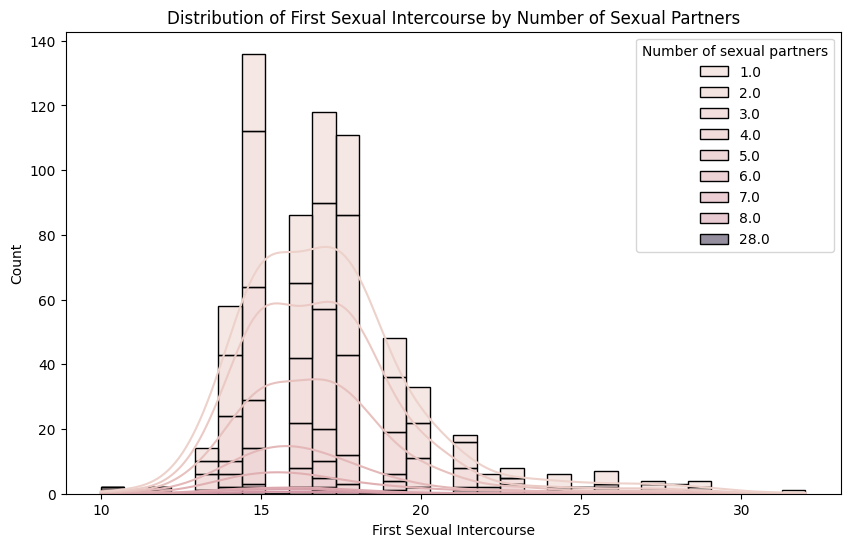

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_cleaned, x='First sexual intercourse', hue='Number of sexual partners', multiple="stack", kde=True, bins=30)
plt.title('Distribution of First Sexual Intercourse by Number of Sexual Partners')
plt.xlabel('First Sexual Intercourse')
plt.ylabel('Count')
plt.show()

# Box plot de número de sexual partners


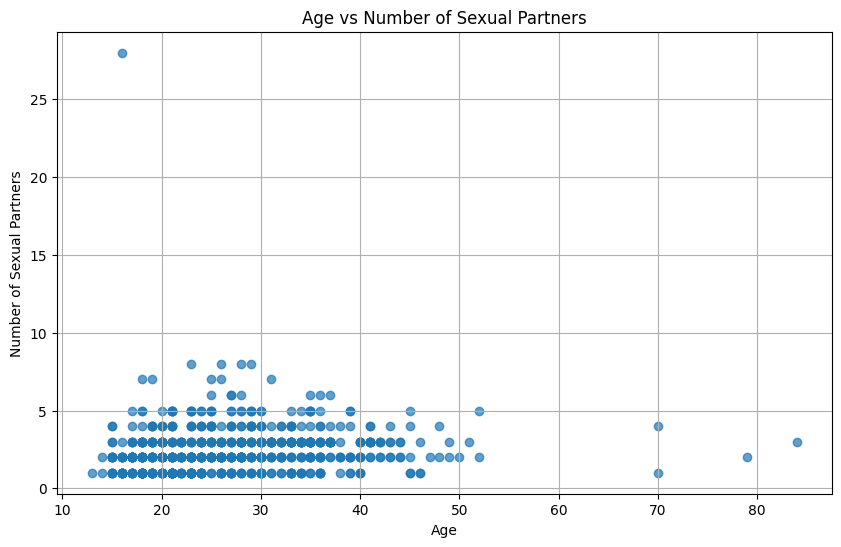

In [29]:
# Scatter plot: Age vs Number of sexual partners
plt.figure(figsize=(10, 6))
plt.scatter(X_cleaned['Age'], X_cleaned['Number of sexual partners'], alpha=0.7)
plt.title('Age vs Number of Sexual Partners')
plt.xlabel('Age')
plt.ylabel('Number of Sexual Partners')
plt.grid(True)
plt.show()

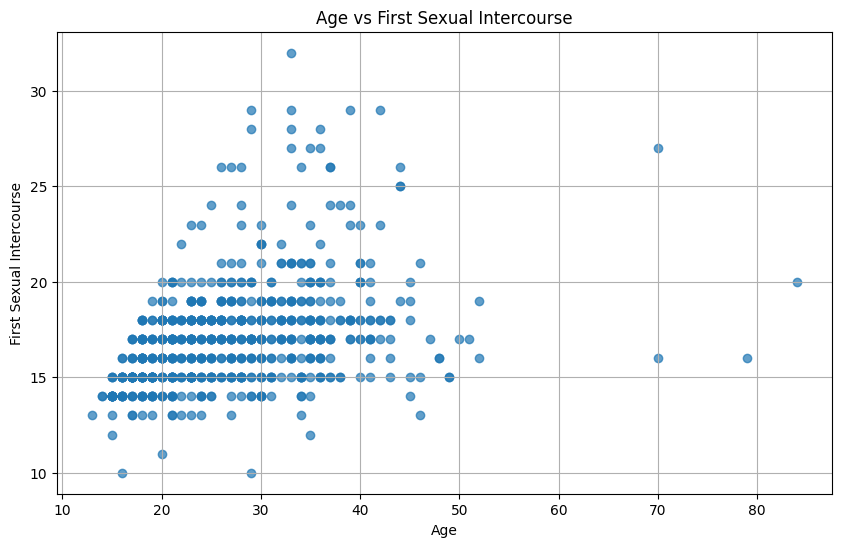

In [30]:
# Scatter plot: Age vs First sexual intercourse
plt.figure(figsize=(10, 6))
plt.scatter(X_cleaned['Age'], X_cleaned['First sexual intercourse'], alpha=0.7)
plt.title('Age vs First Sexual Intercourse')
plt.xlabel('Age')
plt.ylabel('First Sexual Intercourse')
plt.grid(True)
plt.show()

# Scatter plot entre dos características

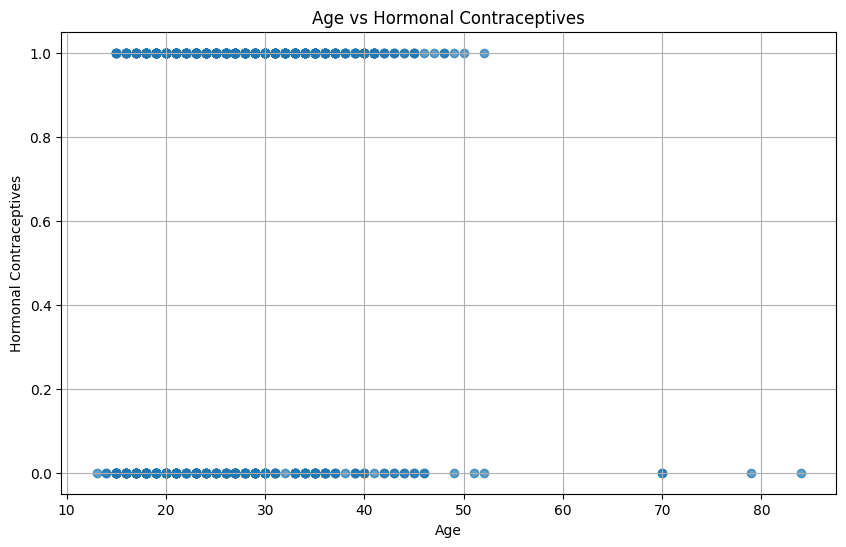

In [31]:
# Scatter plot: Age vs Hormonal Contraceptives (years)
plt.figure(figsize=(10, 6))
plt.scatter(X_cleaned['Age'], X_cleaned['Hormonal Contraceptives'], alpha=0.7)
plt.title('Age vs Hormonal Contraceptives')
plt.xlabel('Age')
plt.ylabel('Hormonal Contraceptives')
plt.grid(True)
plt.show()

In [32]:
X_cleaned.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Hormonal Contraceptives,IUD,STDs,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


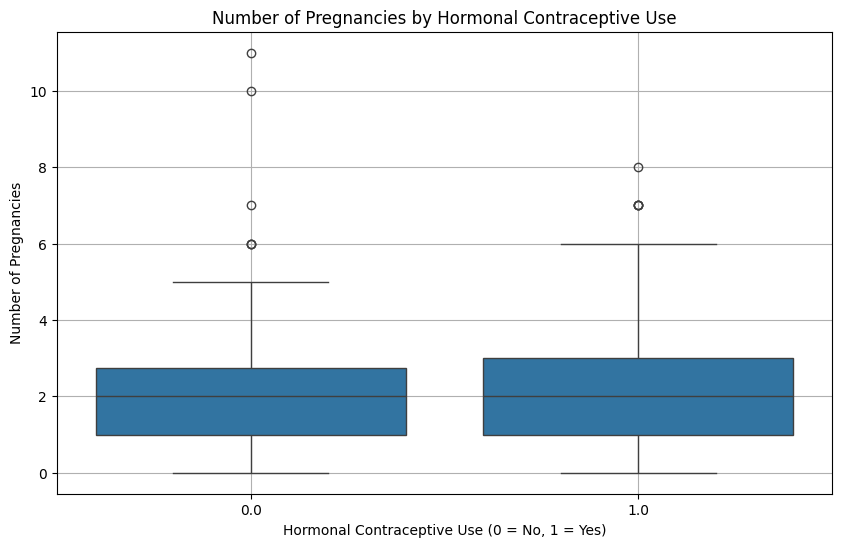

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hormonal Contraceptives', y='Num of pregnancies', data=X_cleaned)
plt.title('Number of Pregnancies by Hormonal Contraceptive Use')
plt.xlabel('Hormonal Contraceptive Use (0 = No, 1 = Yes)')
plt.ylabel('Number of Pregnancies')
plt.grid(True)
plt.show()

In [34]:
num_columns = X_cleaned.iloc[:,1:]

### Test de Esfericidad de Bartlett

H0: La matriz de correlación es igual a la matriz identidad

In [35]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(num_columns)
chi_cuadrado, p_valor

(3498.8933907412957, 0.0)

In [36]:
kmo,kmo_modelo = calculate_kmo(num_columns)
kmo_modelo

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6007270545558117

In [39]:
from sklearn.preprocessing import StandardScaler

# Supongamos que num_columns es tu DataFrame con las columnas numéricas
num_columns = X_cleaned.select_dtypes(include=['float64', 'int64'])

# Crear el pipeline de PCA
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=7))  # Ajusta n_components según tus necesidades
pca_pipe.fit(num_columns)

# Extraer el modelo PCA del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Crear el DataFrame con los componentes principales
num_components = modelo_pca.components_.shape[0]
indices = [f'PC{i+1}' for i in range(num_components)]

pca_df = pd.DataFrame(
    data=modelo_pca.components_,
    columns=num_columns.columns,
    index=indices
)

print(pca_df)

          Age  Number of sexual partners  First sexual intercourse  \
PC1  0.114402                   0.020133                  0.039529   
PC2  0.053215                   0.052408                  0.042672   
PC3  0.625276                   0.153204                  0.174523   
PC4 -0.182400                   0.558331                 -0.556754   
PC5 -0.026875                  -0.008646                 -0.176826   
PC6  0.204295                   0.111034                  0.523749   
PC7  0.017273                  -0.097642                 -0.167933   

     Num of pregnancies    Smokes  Hormonal Contraceptives       IUD  \
PC1            0.097996  0.004792                 0.032549  0.111553   
PC2            0.003451 -0.048423                 0.007408 -0.005685   
PC3            0.575641  0.132851                 0.202059  0.330032   
PC4            0.107652  0.522540                -0.026652  0.005750   
PC5            0.137314 -0.287775                 0.110092  0.158614   
PC6    

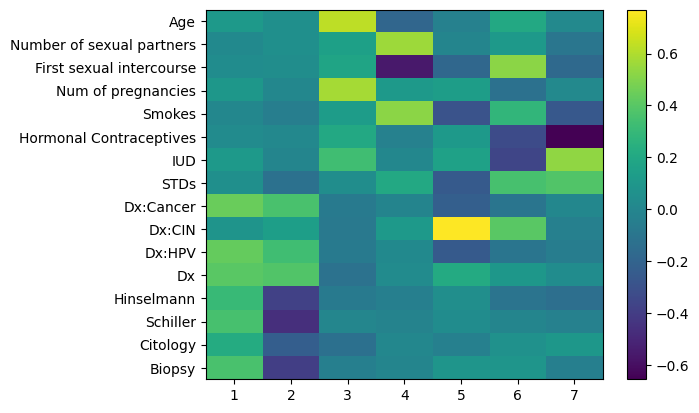

In [44]:
# Crear una figura y ejes
fig, ax = plt.subplots(nrows=1, ncols=1)

# Obtener los componentes del modelo PCA
componentes = modelo_pca.components_

# Graficar la matriz de componentes
plt.imshow(componentes.T, aspect='auto')
plt.yticks(range(len(num_columns.columns)), num_columns.columns)
plt.xticks(range(modelo_pca.n_components_), np.arange(1, modelo_pca.n_components_ + 1))
plt.grid(False)
plt.colorbar()

# Mostrar la gráfica
plt.show()

In [45]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.19284786 0.12973669 0.11244704 0.08665196 0.07233773 0.06606486
 0.06260418]


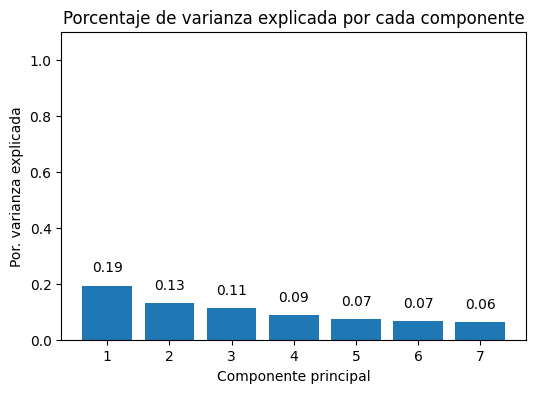

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(num_columns.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.19284786 0.32258455 0.43503159 0.52168354 0.59402127 0.66008613
 0.72269031]


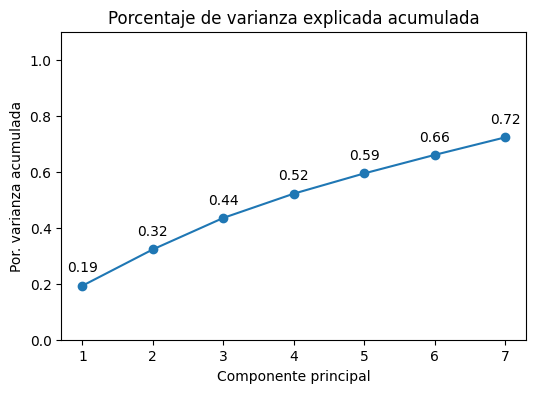

In [48]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

plt.show()
